In [364]:
import pandas as pd
import numpy as np

In [365]:
df = pd.read_csv('stu.csv')

In [366]:
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20,35,Male
1,Emily Brown,102,5,68,Female
2,Michael Lee,103,6,78,Male
3,Emma Johnson,104,5,98,Female
4,William Davis,105,6,72,Male
5,Olivia Wilson,106,5,81,Female
6,James Taylor,107,4,58,Male
7,Sophia Martinez,108,8,52,Female
8,Benjamin Anderson,109,3,20,Male
9,Ava Thomas,110,2,83,Female


In [367]:
df.loc[df['Name'] == 'John Smith', ['FE Marks', 'SE Marks']] = [20, 30]
df.loc[df['Name'].isin(['Alexander Garcia','Daniel Martinez']),'SE Marks']=np.nan


In [368]:
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20,30.0,Male
1,Emily Brown,102,5,68.0,Female
2,Michael Lee,103,6,78.0,Male
3,Emma Johnson,104,5,98.0,Female
4,William Davis,105,6,72.0,Male
5,Olivia Wilson,106,5,81.0,Female
6,James Taylor,107,4,58.0,Male
7,Sophia Martinez,108,8,52.0,Female
8,Benjamin Anderson,109,3,20.0,Male
9,Ava Thomas,110,2,83.0,Female


In [369]:
missing_values = df.isna().sum()

print("Missing values:")
print(missing_values)

Missing values:
Name           0
Roll Number    0
FE Marks       0
SE Marks       2
Gender         0
dtype: int64


In [370]:
df.loc[df['Name'].isin(['Ethan White', 'William Davis']), 'FE Marks'] = np.nan

In [371]:
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20.0,30.0,Male
1,Emily Brown,102,5.0,68.0,Female
2,Michael Lee,103,6.0,78.0,Male
3,Emma Johnson,104,5.0,98.0,Female
4,William Davis,105,NaN,72.0,Male
5,Olivia Wilson,106,5.0,81.0,Female
6,James Taylor,107,4.0,58.0,Male
7,Sophia Martinez,108,8.0,52.0,Female
8,Benjamin Anderson,109,3.0,20.0,Male
9,Ava Thomas,110,2.0,83.0,Female


In [372]:
df['FE Marks'].fillna(df['FE Marks'].mean(), inplace=True)

In [373]:
df['SE Marks'].fillna(df['SE Marks'].mean(), inplace=True)

In [374]:
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20.000000,30.0,Male
1,Emily Brown,102,5.000000,68.0,Female
2,Michael Lee,103,6.000000,78.0,Male
3,Emma Johnson,104,5.000000,98.0,Female
4,William Davis,105,16.277778,72.0,Male
5,Olivia Wilson,106,5.000000,81.0,Female
6,James Taylor,107,4.000000,58.0,Male
7,Sophia Martinez,108,8.000000,52.0,Female
8,Benjamin Anderson,109,3.000000,20.0,Male
9,Ava Thomas,110,2.000000,83.0,Female


In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

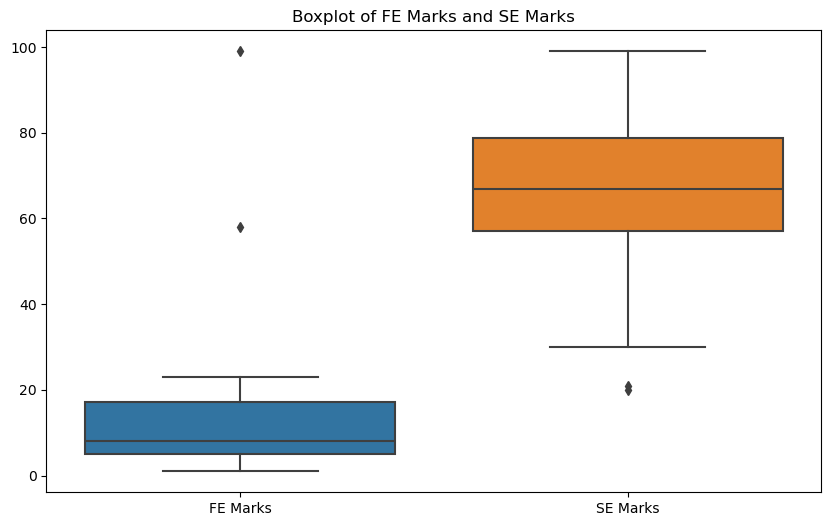

In [376]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['FE Marks', 'SE Marks']])
plt.title('Boxplot of FE Marks and SE Marks')
plt.show()

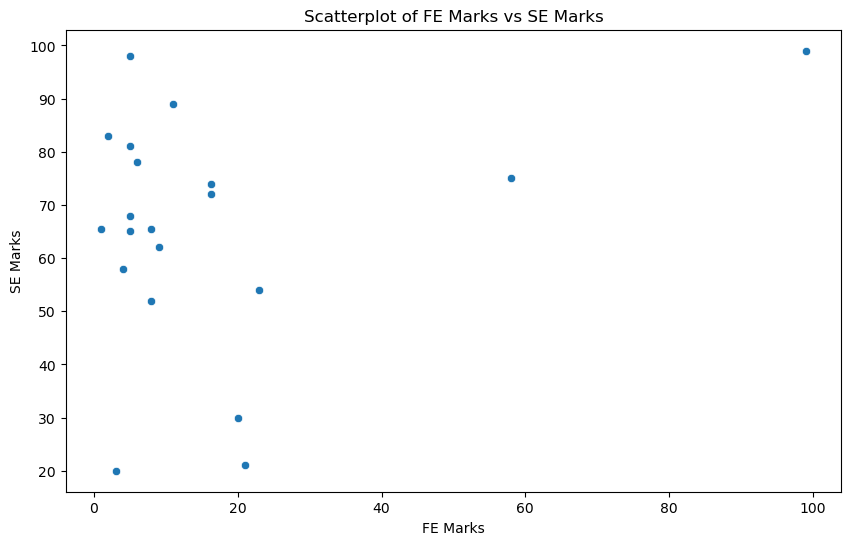

In [377]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FE Marks', y='SE Marks', data=df)
plt.title('Scatterplot of FE Marks vs SE Marks')
plt.show()

In [378]:
# Calculate the interquartile range (IQR) for FE Marks and SE Marks
Q1_FE = df['FE Marks'].quantile(0.25)
Q3_FE = df['FE Marks'].quantile(0.75)
IQR_FE = Q3_FE - Q1_FE

Q1_SE = df['SE Marks'].quantile(0.25)
Q3_SE = df['SE Marks'].quantile(0.75)
IQR_SE = Q3_SE - Q1_SE

# Define the upper and lower bounds for FE Marks and SE Marks
lower_bound_FE = Q1_FE - threshold * IQR_FE
upper_bound_FE = Q3_FE + threshold * IQR_FE

lower_bound_SE = Q1_SE - threshold * IQR_SE
upper_bound_SE = Q3_SE + threshold * IQR_SE

# Trim outliers from the dataset
trimmed_df = df[(df['FE Marks'] >= lower_bound_FE) & (df['FE Marks'] <= upper_bound_FE) & (df['SE Marks'] >= lower_bound_SE) & (df['SE Marks'] <= upper_bound_SE)]

print("Original dataset size:", df.shape)
print("Trimmed dataset size:", trimmed_df.shape)

Original dataset size: (20, 5)
Trimmed dataset size: (16, 5)


In [379]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming your data is stored in a DataFrame called df

# Separate the numerical columns for normalization
numerical_columns = ['FE Marks', 'SE Marks']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()  # Make a copy of the original DataFrame
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()  # Make a copy of the original DataFrame
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Print the first few rows of the normalized DataFrames
print("Min-Max Scaled DataFrame:")
print(df_min_max_scaled.head())

print("\nStandardized DataFrame:")
print(df_standard_scaled.head())

Min-Max Scaled DataFrame:
            Name  Roll Number  FE Marks  SE Marks  Gender
0     John Smith          101  0.193878  0.126582    Male
1    Emily Brown          102  0.040816  0.607595  Female
2    Michael Lee          103  0.051020  0.734177    Male
3   Emma Johnson          104  0.040816  0.987342  Female
4  William Davis          105  0.155896  0.658228    Male

Standardized DataFrame:
            Name  Roll Number  FE Marks  SE Marks  Gender
0     John Smith          101  0.164327 -1.642876    Male
1    Emily Brown          102 -0.497887  0.115695  Female
2    Michael Lee          103 -0.453739  0.578477    Male
3   Emma Johnson          104 -0.497887  1.504041  Female
4  William Davis          105  0.000000  0.300808    Male


In [222]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

             Name  Roll Number FE Marks  SE Marks Gender
4   William Davis          105      NaN        72   Male
14    Ethan White          115      NaN        74   Male


In [223]:
hi=df[df['SE Marks']==21]

In [224]:
print(hi)

        Name  Roll Number FE Marks  SE Marks Gender
15  om patil          116     99.0        21   Male
19      g  h          120     21.0        21   male
